# Testing the model 

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
cnn = tf.keras.models.load_model('trnew_cancer_model.keras')

In [2]:
# validation_set = tf.keras.utils.image_dataset_from_directory(
#    r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\val",
#     labels="inferred",
#     label_mode="categorical",
#     class_names=None,
#     color_mode="rgb",
#     batch_size=32,
#     image_size=(128, 128),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation="bilinear",
#     follow_links=False,
#     crop_to_aspect_ratio=False
# )
# class_name = validation_set.class_names
# print(class_name)

Found 1581 files belonging to 2 classes.
['benign', 'malignant']


1/1 [==============================] - 0s 20ms/step


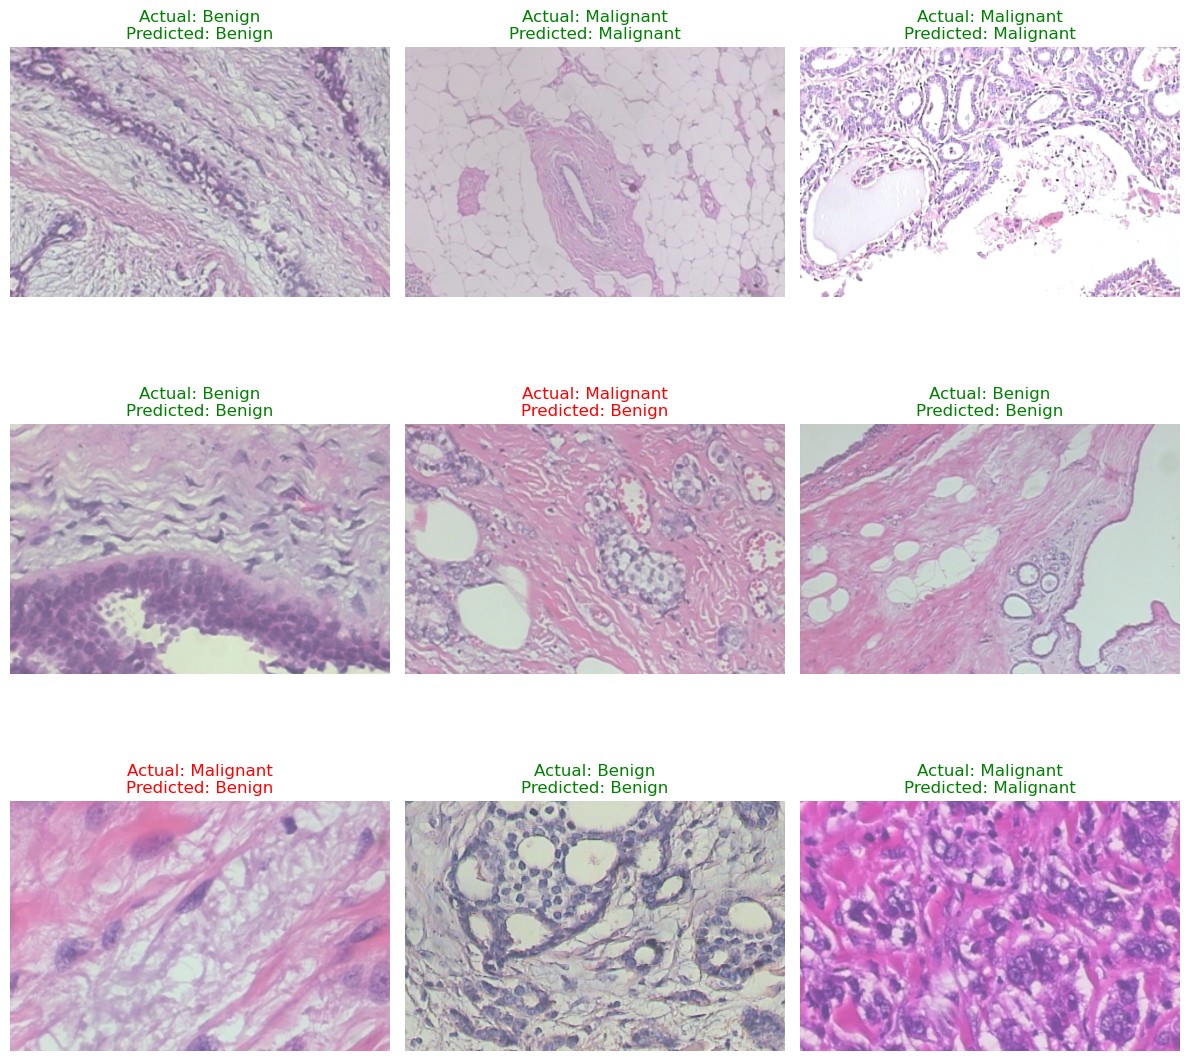

In [3]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Define paths for benign and malignant folders
benign_path = r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\test\benign"
malignant_path = r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\test\malignant"

# Get all image file paths from both folders
benign_images = [os.path.join(benign_path, img) for img in os.listdir(benign_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
malignant_images = [os.path.join(malignant_path, img) for img in os.listdir(malignant_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 9 images (combined from both classes)
selected_images = random.sample(benign_images, 4) + random.sample(malignant_images, 5)
random.shuffle(selected_images)  # Shuffle to mix benign and malignant images

# Predefined class names
class_name = ['Benign', 'Malignant']

# Load and process each image
plt.figure(figsize=(12, 12))
for idx, image_path in enumerate(selected_images):
    # Read and preprocess the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
    
    # Determine the actual classification based on the folder name
    actual_label = 'Benign' if 'benign' in image_path.lower() else 'Malignant'
    
    # Resize and prepare for model prediction
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch
    
    # Make predictions
    predictions = cnn.predict(input_arr)
    result_index = np.argmax(predictions)  # Get the predicted class index
    predicted_label = class_name[result_index]  # Map index to class name

    # Plot the image with actual and predicted labels
    plt.subplot(3, 3, idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", color='green' if actual_label == predicted_label else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()
